- **Nama:** Hans Kristiandi
- **Email:** hanskristiandi@gmail.com
- **ID Dicoding:** MC006D5Y2205

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from itertools import combinations
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [1087]:
df = pd.read_csv('https://raw.githubusercontent.com/hansk88/Proyek-2/refs/heads/main/bank_transactions_data_2.csv')
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [1088]:
# Meninjau jumlah baris kolom dan tipe data pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

Didapati dataset memiliki 2512 baris dan 16 kolom dan terdapat tipe data kategorikal seperti tipe transaksi dan lokasi serta tipe data numerikal seperti jumlah transaksi dan umur pelanggan

In [1089]:
# Cek missing values
print(df.isnull().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


Semua kolom tidak memiliki nilai null, artinya tidak ada missing values yang perlu ditangani

In [1090]:
# Menampilkan statistik deskriptif dari dataset untuk kolom numerik
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


Untuk kolom yang bertipe data numerik, diperoleh informasi sebagai berikut:
1. TransactionAmount: Memiliki nilai di interval [0.26, 1919.11] dengan rata-rata transaksi yaitu 297.6 dan median yaitu 211.14
2. CustomerAge_ Memiliki nilai di interval [19, 80] dengan rata-rata umur pelanggan yaitu 44 tahun 245 hari dan median yaitu 45
3. TransactionDuration: Memiliki nilai di interval [10, 300] dengan rata-rata 119.64 dan median yaitu 112.5
4. LoginAttempts: Memiliki nilai di interval [1, 5] dengan rata-rata dan median yaitu 1 kali
5. AccountBalance: Memiliki nilai di interval [101.25, 14977.99] dengan rata-rata 5114.3 dan median yaitu 4735.51

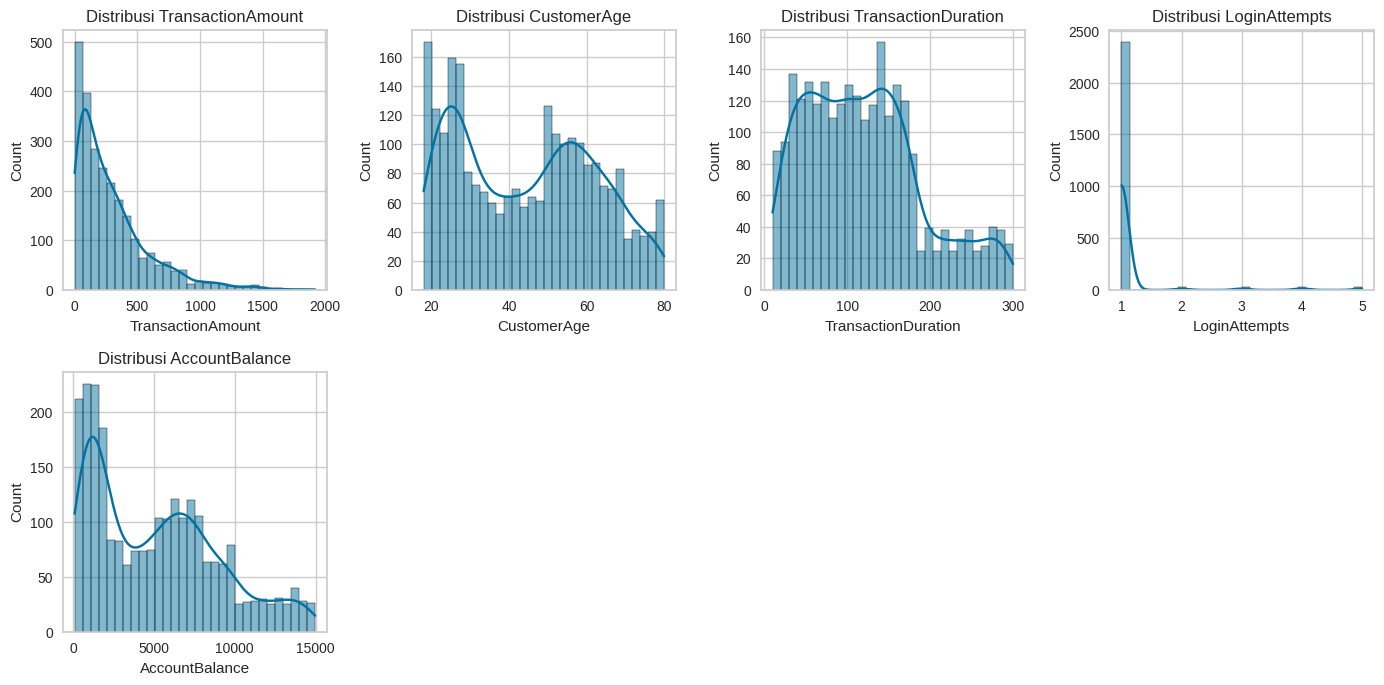

In [1091]:
# Analisis distribusi variabel numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

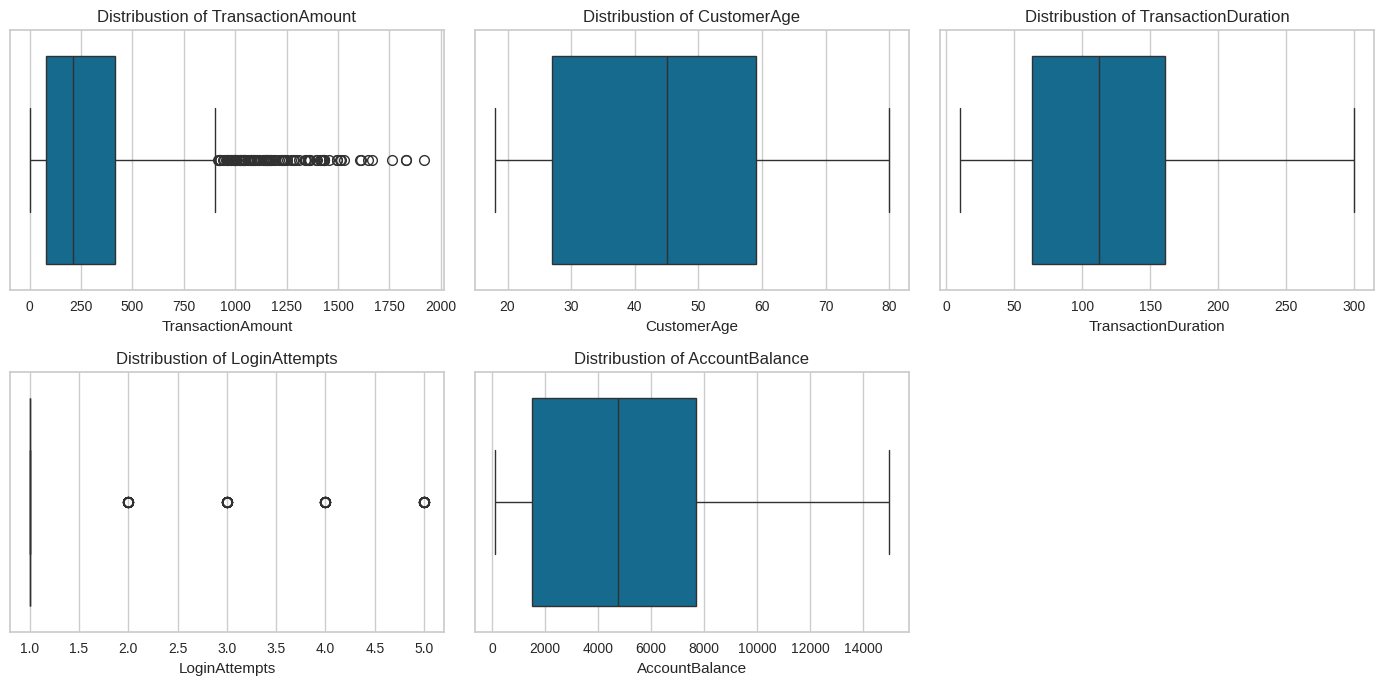

In [1092]:
# Analisis distribusi variabel numerik
num_features = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, column in enumerate(num_features.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[column])
    plt.title(f'Distribustion of {column}')
plt.tight_layout()
plt.show()

Berdasarkan histogram dan boxplot di atas, terlihat bahwa kebanyakan variabel numerik cenderung berdistribusi *right-skewed*. Selain itu didapati bahwa pada TransactionAmount dan LoginAttempts terdapat beberapa outliers, sedangkan untuk CustomerAge, TransactionDuration, dan AccountBalance data terdistribusi dengan baik dan tidak ada outliers

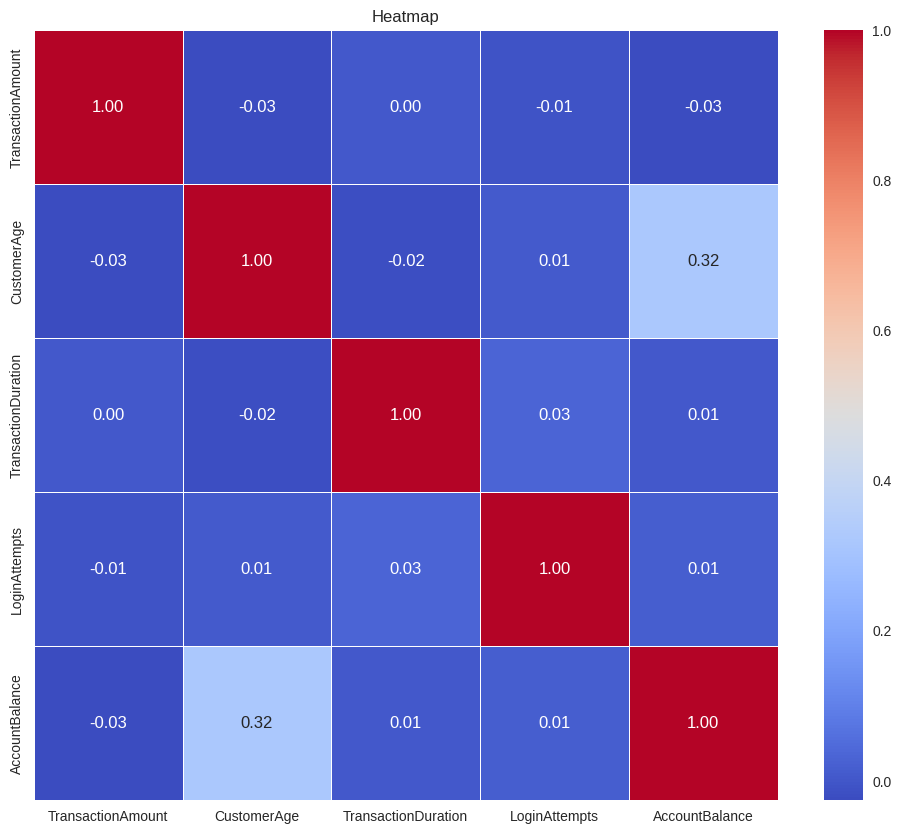

In [1093]:
# Matriks korelasi untuk variabel numerik
plt.figure(figsize=(12, 10))
correlation_matrix = num_features.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap')
plt.show()

Dari matriks korelasi di atas, terlihat bahwa tidak ada hubungan korelasi yang begitu berarti dimana korelasi terbesar yaitu hubungan korelasi yang positif antara CustomerAge dengan AccountBalance, menunjukkan bahwa meningkatnya umur berkaitan dengan meningkatnya saldo rekening

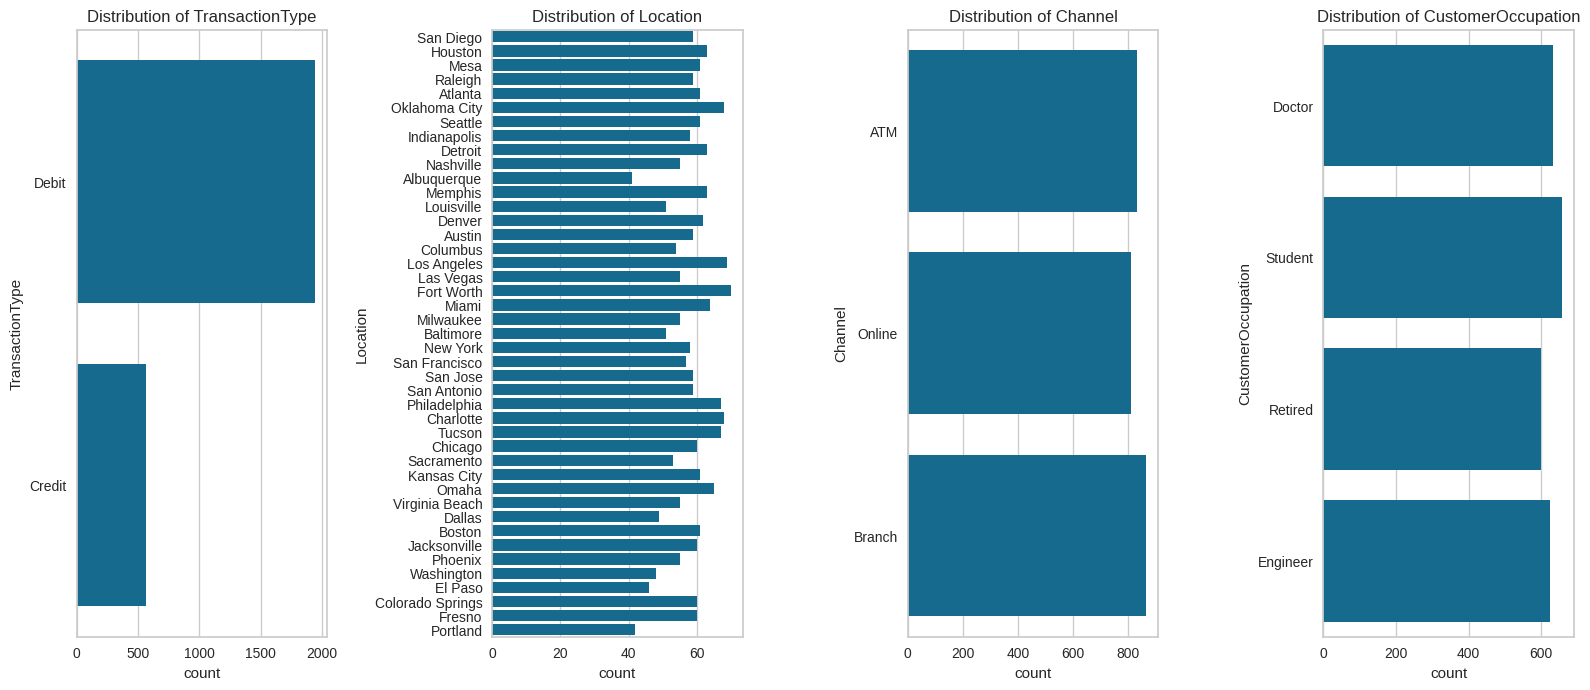

In [1094]:
# Distribusi fitur kategorikal
selected_columns = ['TransactionType', 'Location', 'Channel', 'CustomerOccupation']
cat_features = df[selected_columns]
plt.figure(figsize=(16, 20))
for i, column in enumerate(cat_features.columns, 1):
    plt.subplot(3, 4, i)
    sns.countplot(y=df[column])
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()

Dari diagram batang di atas, terlihat bahwa jenis transaksi kebanyakan menggunakan debit dan dilakukan di kantor cabang dengan kategori pelanggan terbanyak yaitu siswa

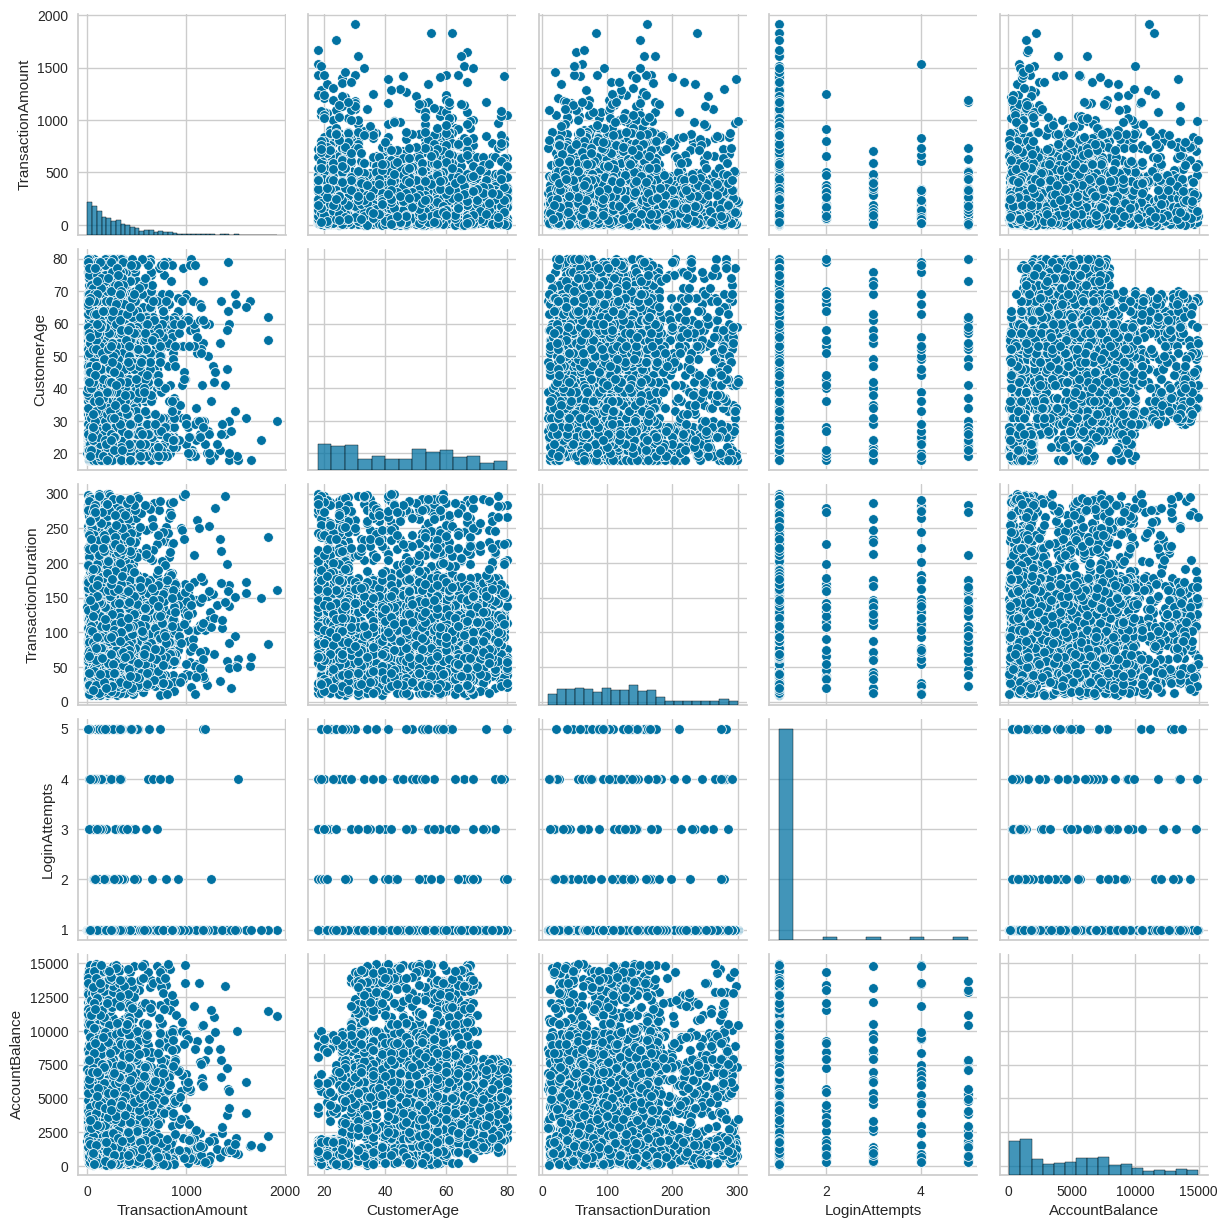

In [1095]:
# Pairplot untuk variabel numerik
sns.pairplot(num_features)
plt.show()

Dari parirplot di atas, terlihat bahwa banyak variabel yang tidak berkorelasi dengan kuat, ditunjukkan dengan persebaran titik yang cenderung merata di hampir semua pairplot

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [1096]:
# Hapus kolom yang tidak relevan
df = df.drop(columns=['TransactionID', 'AccountID', 'TransactionDate', 'DeviceID', 'IP Address', 'MerchantID', 'PreviousTransactionDate'])
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40


Diperoleh sebuah dataframe dengan fitur-fitur yang akan relevan dengan analisis selanjutnya

In [1097]:
# Mengecek apakah ada data yang terduplikat
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


Diperoleh bahwa dataframe tidak mengandung nilai yang duplikat

In [1098]:
# Standardisasi semua kolom numerik
scaler = StandardScaler()
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,Debit,San Diego,ATM,1.423718,Doctor,-0.552443,-0.206794,-0.000537
1,0.269440,Debit,Houston,ATM,1.311287,Doctor,0.305314,-0.206794,2.216472
2,-0.586882,Debit,Mesa,Online,-1.443277,Student,-0.909842,-0.206794,-1.023534
3,-0.387456,Debit,Raleigh,Online,-1.049768,Student,-1.353017,-0.206794,0.885797
4,-0.973468,Credit,Atlanta,Online,-1.049768,Student,1.120184,-0.206794,0.593589


Karena nantinya akan menggunakan metode K-Means clustering, maka dilakukan standardiasi

**Karena dataset berkaitan dengan fraud detection maka outlier tidak akan dihapus agar pola terbaik bisa didapatkan**

In [1099]:
# Encoding data kategorikal
label_encoders = {}

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589


Dengan menggunakan label encoding, setiap data kategorikal dikonversi menjadi angka numerik, contohnya pada kolom TransactionType dan Location

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [1100]:
# Menyeleksi kolom yang relevan
X = df.iloc[:, [6, 7]].values

# Menampilkan data seleksi dalam format DataFrame
pd.DataFrame(X, columns=['TransactionDuration', 'LoginAttempts'])

,TransactionDuration,LoginAttempts
0,-0.552443,-0.206794
1,0.305314,-0.206794
2,-0.909842,-0.206794
3,-1.353017,-0.206794
4,1.120184,-0.206794
...,...,...
2507,-0.152156,-0.206794
2508,0.819969,-0.206794
2509,0.376794,-0.206794
2510,-1.438793,-0.206794


Diambil dua fitur terpenting dalam mendeteksi fraud detection yaitu TransactionDuration, dan LoginAttempts

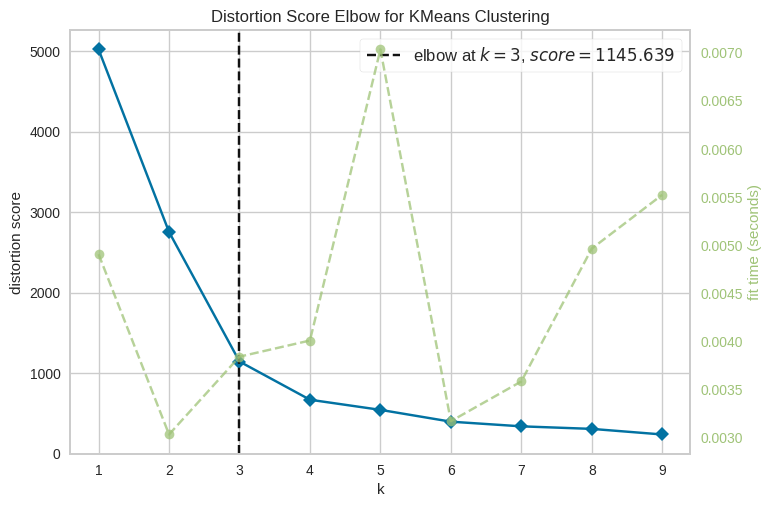

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1101]:
# Menentukan jumlah cluster yang optimal
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

Didapatkan jumlah kluster yang optimal yaitu 3 dengan nilai Within Cluster Sum of Squares (WCSS) sebesar 1145.798

In [1102]:
# Melatih model dengan metode K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

In [1103]:
# Memasukkan label yaitu cluster_id ke dalam dataframe
df["cluster_id"] = labels
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,cluster_id
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,1
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,0
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,1
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,1
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,0


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [1104]:
# Menghitung silhouette score
silhouette_avg = silhouette_score(X, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.57


Diperoleh bahwa silhouette score untuk K-Means clustering sebelum dilakukan feature selection adalah 0.57

## **c. Feature Selection (Mencari 5 Fitur Terbaik)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [1105]:
# Inisialisasi label
A = df.drop('cluster_id', axis=1)
b = df['cluster_id']

# Menggunakan Random Forest untuk mendapatkan fitur penting
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(A, b)

# Mendapatkan fitur penting
importances = rf_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Menentukan ambang batas untuk fitur penting
threshold = 0.005
important_features_indices = [i for i in range(len(importances)) if importances[i] >= threshold]

# Menampilkan fitur penting beserta nilainya
print("Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):")
for i in important_features_indices:
    print(f"{A.columns[i]}: {importances[i]}")

# Mendapatkan nama kolom penting berdasarkan importance
important_features = A.columns[important_features_indices]

# Memindahkan fitur penting ke variabel baru
A_important = A[important_features]

# X_important sekarang berisi hanya fitur penting
print("\nDimensi data pelatihan dengan fitur penting:", A_important.shape)

Fitur yang dipilih dengan Embedded Methods (di atas ambang batas):
TransactionAmount: 0.008096053517339469
CustomerAge: 0.0062704015222653665
TransactionDuration: 0.8617923398919083
LoginAttempts: 0.10883200079276215
AccountBalance: 0.007393892744293355

Dimensi data pelatihan dengan fitur penting: (2512, 5)


Dengan menggunakan ambang batas hubungan antar variabel sebesar 0.5% didapatkan 5 fitur yaitu TransactionAmount, CustomerAge, TransactionDuration, LoginAttempts, dan AccountBalance

In [1106]:
A.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589


In [1107]:
# Menyeleksi kolom yang relevan
A = df.iloc[:, [0, 4, 6, 7, 8]].values

# Menampilkan data seleksi dalam format DataFrame
pd.DataFrame(A, columns=['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance'])

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537
1,0.269440,1.311287,0.305314,-0.206794,2.216472
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589
...,...,...,...,...,...
2507,1.913802,-0.656259,-0.152156,-0.206794,1.942606
2508,-0.157779,0.186975,0.819969,-0.206794,-1.245986
2509,-0.921462,0.636700,0.376794,-0.206794,-0.443928
2510,-0.382420,-1.218415,-1.438793,-0.206794,-0.855705


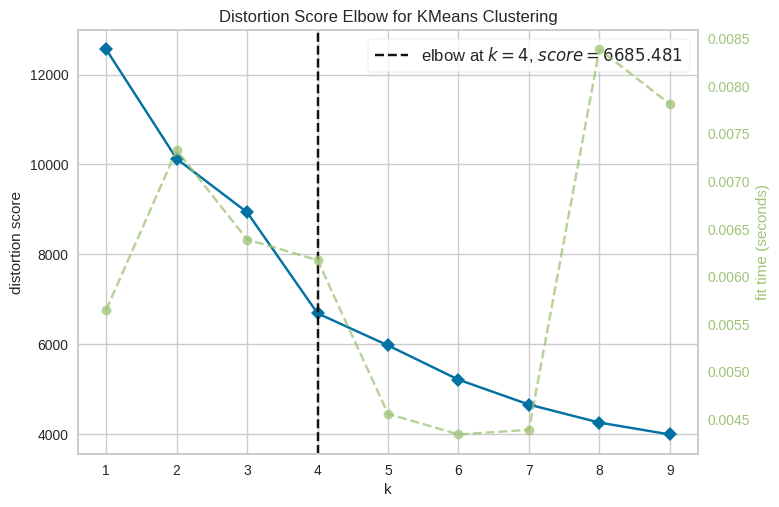

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1108]:
# Menentukan jumlah cluster yang optimal
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(A)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [1109]:
# Melatih model dengan metode K-Means Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(A)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 4

In [1110]:
# Menghitung silhouette score
silhouette_avg = silhouette_score(A, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.24


Dengan melakukan feature selection dan memilih 5 fitur seleksi, terlihat bahwa silhouette score menurun menjadi 0.24

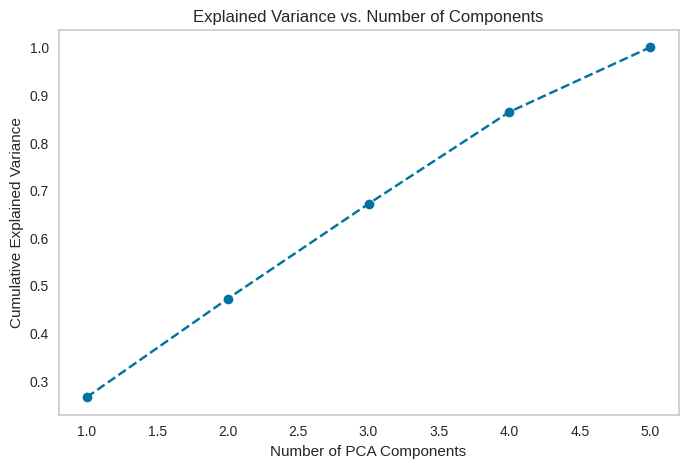

In [1111]:
# Menggunakan PCA untuk meningkatkan silhouette score
pca = PCA(n_components=None)
A_pca = pca.fit_transform(A)

explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Menampilkan grafik explained_variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance vs. Number of Components")
plt.grid()
plt.show()

optimal_components = np.argmax(explained_variance >= 0.90) + 1
pca = PCA(n_components=optimal_components)
A_pca_final = pca.fit_transform(A)

In [1112]:
# Menggunakan K-Means pada data yang telah ditransformasi dengan PCA
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
clusters = kmeans.fit_predict(A_pca_final)

# Cek silhouette score
silhouette = silhouette_score(A_pca_final, clusters)
print(f"Silhouette Score (After PCA): {silhouette:.2f}")

Silhouette Score (After PCA): 0.26


Setelah dilakukan PCA pada data, silhouette score meningkat sedikit menjadi 0.26

## **cc. Feature Selection (Memilih Fitur Optimal Sehingga Silhouette Score >0.7)**

In [1124]:
# Mencari kombinasi fitur terbaik
M = df.drop('cluster_id', axis=1)
n = df['cluster_id']

numerical_features = M.select_dtypes(include=[np.number])

def evaluate_silhouette(M, n):
    return silhouette_score(M, n)

combination = []

feature_names = list(numerical_features.columns)

for i in range(2, min(len(feature_names), 6) + 1):
    for feature_subset in combinations(feature_names, i):
        selected_columns = df[list(feature_subset)].values
        scaled_selected = scaler.fit_transform(selected_columns)
        kmeans = KMeans(n_clusters=3, random_state=0, n_init=10)
        labels = kmeans.fit_predict(scaled_selected)

        # Menghitung silhouette score
        score = evaluate_silhouette(scaled_selected, labels)

        # Menyimpan kombinasi fitur dengan silhouette score
        combination.append((feature_subset, score))

print("Kombinasi fitur dengan silhouette score:")
for features, score in combination:
    print(f"Features: {features}, Skor: {score:.2f}")

Kombinasi fitur dengan silhouette score:
Features: ('TransactionAmount', 'CustomerAge'), Skor: 0.47
Features: ('TransactionAmount', 'TransactionDuration'), Skor: 0.42
Features: ('TransactionAmount', 'LoginAttempts'), Skor: 0.66
Features: ('TransactionAmount', 'AccountBalance'), Skor: 0.44
Features: ('CustomerAge', 'TransactionDuration'), Skor: 0.41
Features: ('CustomerAge', 'LoginAttempts'), Skor: 0.65
Features: ('CustomerAge', 'AccountBalance'), Skor: 0.49
Features: ('TransactionDuration', 'LoginAttempts'), Skor: 0.57
Features: ('TransactionDuration', 'AccountBalance'), Skor: 0.38
Features: ('LoginAttempts', 'AccountBalance'), Skor: 0.62
Features: ('TransactionAmount', 'CustomerAge', 'TransactionDuration'), Skor: 0.30
Features: ('TransactionAmount', 'CustomerAge', 'LoginAttempts'), Skor: 0.41
Features: ('TransactionAmount', 'CustomerAge', 'AccountBalance'), Skor: 0.35
Features: ('TransactionAmount', 'TransactionDuration', 'LoginAttempts'), Skor: 0.35
Features: ('TransactionAmount', 'T

Dari kombinasi fitur di atas, terlihat bahwa tidak mungkin untuk mendapatkan silhouette score >0.7. Dari kombinasi fitur yang telah dilakukan sebelumnya, akan dipilih dua fitur utama yang memiliki silhouette score tertinggi yaitu TransactionAmount dan LoginAttempts

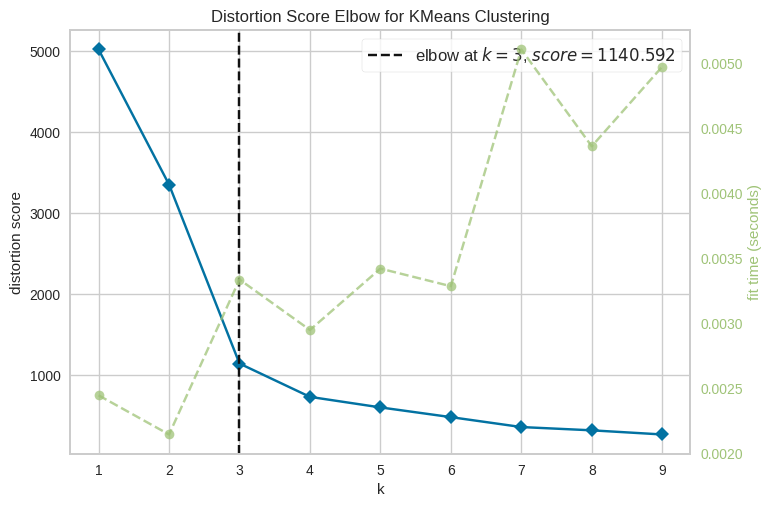

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [1114]:
# Inisialisasi label
C = df.drop('cluster_id', axis=1)

# Menyeleksi kolom yang relevan
C = df.iloc[:, [0, 7]].values

# Menampilkan data seleksi dalam format DataFrame
pd.DataFrame(C, columns=['TransactionAmount', 'LoginAttempts'])

# Menentukan jumlah cluster yang optimal
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(C)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

In [1115]:
# Melatih model dengan metode K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(C)

# Mendapatkan label cluster
labels = kmeans.labels_

# Mendapatkan jumlah cluster
k = 3

# Menghitung silhouette score
silhouette_avg = silhouette_score(C, labels)
print(f"Silhouette Score: {silhouette_avg:.2f}")

Silhouette Score: 0.66


## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

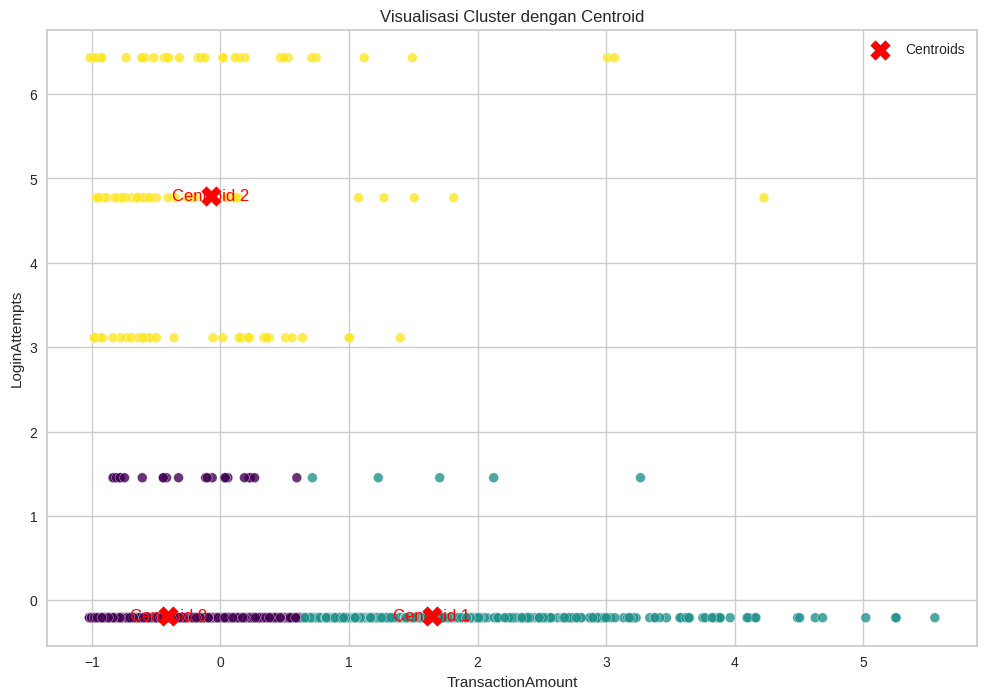

Nilai Centroids:
Centroid 0: TransactionAmount = -0.41, LoginAttempts = -0.19
Centroid 1: TransactionAmount = 1.64, LoginAttempts = -0.19
Centroid 2: TransactionAmount = -0.07, LoginAttempts = 4.79


In [1116]:
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_

# Visualisasi cluster
plt.figure(figsize=(12, 8))

# Plot data
plt.scatter(C[:, 0], C[:, 1], c=labels, cmap='viridis', s=50, alpha=0.8, edgecolors='w', marker='o')

# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i}', color='red', fontsize=12, ha='center', va='center')

# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('TransactionAmount')
plt.ylabel('LoginAttempts')
plt.legend()

plt.show()

# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i}: TransactionAmount = {centroid[0]:.2f}, LoginAttempts = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

In [1117]:
# Menampilkan dataframe yang telah dilengkapi dengan label
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,cluster_id
0,-0.971275,1,36,0,1.423718,0,-0.552443,-0.206794,-0.000537,1
1,0.269440,1,15,0,1.311287,0,0.305314,-0.206794,2.216472,0
2,-0.586882,1,23,2,-1.443277,3,-0.909842,-0.206794,-1.023534,1
3,-0.387456,1,33,2,-1.049768,3,-1.353017,-0.206794,0.885797,1
4,-0.973468,0,1,2,-1.049768,3,1.120184,-0.206794,0.593589,0


Label cluster ditambahkan ke dalam dataframe

In [1118]:
# Melakukan inverse untuk mengembalikan kolom kategorikal yang telah di encoding ke bentuk semula
for column in categorical_columns:
    df[column + "_original"] = label_encoders[column].inverse_transform(df[column].values)

df.drop(columns=['TransactionType', 'Location', 'Channel', 'CustomerOccupation'], inplace=True)
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,cluster_id,TransactionType_original,Location_original,Channel_original,CustomerOccupation_original
0,-0.971275,1.423718,-0.552443,-0.206794,-0.000537,1,Debit,San Diego,ATM,Doctor
1,0.269440,1.311287,0.305314,-0.206794,2.216472,0,Debit,Houston,ATM,Doctor
2,-0.586882,-1.443277,-0.909842,-0.206794,-1.023534,1,Debit,Mesa,Online,Student
3,-0.387456,-1.049768,-1.353017,-0.206794,0.885797,1,Debit,Raleigh,Online,Student
4,-0.973468,-1.049768,1.120184,-0.206794,0.593589,0,Credit,Atlanta,Online,Student


### Inverse Data Jika Melakukan Normalisasi/Standardisasi

In [1119]:
# Melakukan inverse untuk mengembalikan data yang telah di standardisasi ke bentuk semula
df[numeric_columns] = scaler.inverse_transform(df[numeric_columns])

In [1120]:
# Memindahkan label ke kolom paling kanan
df = df[[col for col in df.columns if col != "cluster_id"] + ["cluster_id"]]

# Mencetak hasil akhir
df.head()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionType_original,Location_original,Channel_original,CustomerOccupation_original,cluster_id
0,14.09,70.0,81.0,1.0,5112.21,Debit,San Diego,ATM,Doctor,1
1,376.24,68.0,141.0,1.0,13758.91,Debit,Houston,ATM,Doctor,0
2,126.29,19.0,56.0,1.0,1122.35,Debit,Mesa,Online,Student,1
3,184.50,26.0,25.0,1.0,8569.06,Debit,Raleigh,Online,Student,1
4,13.45,26.0,198.0,1.0,7429.40,Credit,Atlanta,Online,Student,0


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [1121]:
# Melakukan analisis karakteristik tiap cluster

C_original = df.iloc[:, [0, 3]].values

# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(C_original, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = C_original[labels == cluster_id]

        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_TransactionAmount = cluster_data[:, 0].mean()
        mean_LoginAttempts = cluster_data[:, 1].mean()

        print(f"\nCluster {cluster_id}:")
        print(f"Rata-rata TransactionAmount: {mean_TransactionAmount:.2f}")
        print(f"Rata-rata LoginAttempts Score: {mean_LoginAttempts:.2f}")

# Analisis karakteristik setiap cluster
analyze_clusters(C_original, labels, k)

print('\n')

cluster_counts = df["cluster_id"].value_counts()
print(cluster_counts)

Analisis Karakteristik Setiap Cluster:

Cluster 0:
Rata-rata TransactionAmount: 179.70
Rata-rata LoginAttempts Score: 1.01

Cluster 1:
Rata-rata TransactionAmount: 778.79
Rata-rata LoginAttempts Score: 1.01

Cluster 2:
Rata-rata TransactionAmount: 276.32
Rata-rata LoginAttempts Score: 4.01


cluster_id
1    1392
0    1025
2      95
Name: count, dtype: int64


Tulis hasil interpretasinya di sini.
1. Cluster 0
- **Rata-rata TransactionAmount:** 179.7
- **Rata-rata LoginAttempts Score:** 1.01 kali
- **Interpretasi:** Cluster ini mengelompokkan transaksi perbankan dengan total transaksi yaitu 179.7 dengan rata-rata percobaan login sebanyak satu kali. Ini menunjukkan pola dimana seorang customer melakukan transaksi dalam jumlah kecil serta masih dalam kategori aman
2. Cluster 1
- **Rata-rata TransactionAmount:** 778.09
- **Rata-rata LoginAttempts Score:** 1.01 kali
- **Interpretasi:** Cluster ini mengelompokkan transaksi perbankan dengan total transaksi yaitu 778.09 dengan rata-rata percobaan login sebanyak satu kali. Ini menunjukkan pola dimana seorang customer melakukan transaksi dalam jumlah yang besar serta masih dalam kategori aman
3. Cluster 2
- **Rata-rata TransactionAmount:** 276.32
- **Rata-rata LoginAttempts Score:** 4.01 kali
- **Interpretasi:** Cluster ini mengelompokkan transaksi perbankan dengan total transaksi yaitu 276.32 dengan rata-rata percobaan login sebanyak empat kali. Ini menunjukkan pola dimana transaki tersebut wajib diwaspadai karena membutuhkan percobaan login sebanyak empat kali dan melakukan transaksi dalam jumlah yang tidak kecil

Dari ketiga cluster di atas, dapat disimpulkan bahwa jumlah transaksi bervariasi dari kecil hingga besar. Namun ketika transaki membutuhkan 4 kali percobaan masuk dan dilakukan dalam jumlah di atas 276.32, maka transaksi tersebut sebaiknya diwaspadai karena ada kemungkinan terjadinya ***fraud***

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1122]:
df.to_csv("bank_transactions_data_after_clustering.csv", index=False)